In [2]:
# 制作者：
# 代码语言：R
# 内容：基础数据分析图表

library(ggplot2)
library(dplyr)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




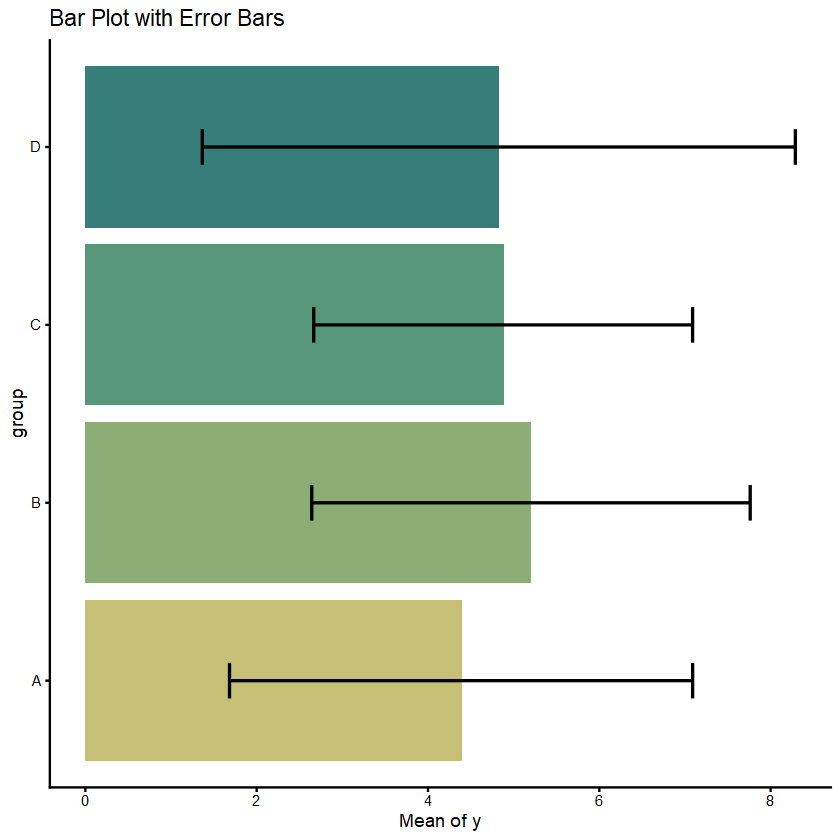

In [ ]:
# =============条形图部分=============
# 适用数据：分组变量 + 数值变量

# 1. 误差条形图(均值条形图+误差线)

data_1 <- data.frame(
  y = runif(100,min=0, max=10),
  group = rep(c("A", "B", "C", "D"), each=25)
)

# 计算每组的均值和标准差
data_summary_1 <- data1 %>%
  group_by(group) %>%
  summarise(mean_y = mean(y), sd_y = sd(y))
  
# data_bar_summary

# 定义颜色
color <- c("#c6c077", "#8aae76", "#59977a", "#377d79")


p_bar <- ggplot(data_summary_1, aes(x = group, y = mean_y, fill = group)) + # 注意此处x轴为分组变量
    # 绘制条形图
    geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
    # 添加误差线（不需要的话可删除该部分）
    geom_errorbar(
        aes(ymin = mean_y - sd_y, ymax = mean_y + sd_y), # 定义正常数据的 范围
        width = 0.2, # 误差棒顶端横线的宽度
        position = position_dodge(0.9), # 必须与 geom_bar 的 width 保持一致以对齐
        size = 0.7, # 误差棒线条粗细
        color = "black" # 误差棒颜色
    ) +

    # 修改颜色
    scale_fill_manual(values = color) +

    # 主题修饰
    theme_classic() + # 使用经典主题
    labs(
    title = "Bar Plot with Error Bars",
    x = "group",
    y = "Mean of y",
    fill = "group"
    ) +

    theme(legend.position = "none") + # 隐藏图例

    # 水平摆放
    coord_flip()
p_bar


# 2. 堆积条形图

data_2 <- data.frame(
  group = rep(c("A", "B", "C"), each = 3),
  category = rep(c("X", "Y", "Z"), times = 3),
  value = c(10, 15, 5, 20, 10, 10, 15, 5, 20)
)

stackedbar_plot <- ggplot(data_2, aes(x = group, y = value, fill = category)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("#c6c077", "#8aae76", "#59977a")) + # 自定义颜色
  theme_minimal() +
  labs(
    title = "Stacked Bar Plot",
    x = "Group",
    y = "Value",
    fill = "Category"
  )